In [1]:
import pandas as pd
import numpy as np
from io import StringIO
from classes import BalancedUndersamplingShuffle, balanced_sampling
from helpers import plot_learning_curve, plot_validation_curve, fit_and_score_pipeline, exp_range
from sklearn.model_selection import ShuffleSplit, StratifiedKFold
from sklearn.metrics import check_scoring
from sklearn.model_selection._validation import _fit_and_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.metrics import fbeta_score, make_scorer
from sklearn.ensemble import AdaBoostClassifier

In [2]:
from scipy.io import arff

with open('1year.arff','r') as f:
    data1, meta1 = arff.loadarff(f)
    data1 = np.asarray(data1.tolist(), dtype=np.float32)
    print(data1.shape)

with open('2year.arff','r') as f:
    data2, meta2 = arff.loadarff(f)
    data2 = np.asarray(data2.tolist(), dtype=np.float32)
    print(data2.shape)

with open('3year.arff','r') as f:
    data3, meta3 = arff.loadarff(f)
    data3 = np.asarray(data3.tolist(), dtype=np.float32)
    print(data3.shape)

with open('4year.arff','r') as f:
    data4, meta4 = arff.loadarff(f)
    data4 = np.asarray(data4.tolist(), dtype=np.float32)
    print(data4.shape)

with open('5year.arff','r') as f:
    data5, meta5 = arff.loadarff(f)
    data5 = np.asarray(data5.tolist(), dtype=np.float32)
    print(data5.shape)


(7027, 65)
(10173, 65)
(10503, 65)
(9792, 65)
(5910, 65)


In [3]:
data = np.concatenate([data1, data2, data3, data4, data5], axis=0)
data[np.isnan(data)] = 0

X, y = data[:,:-1], data[:, -1]

y[y == 0] = -1
X, y, idx = balanced_sampling(X, y, r = 3, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


print(f'X.shape={X.shape}, y.shape={y.shape}')

a=0.10662111516202229, r=3, gamma=19.758010521281683
X.shape=(8362, 64), y.shape=(8362,)


# Naive fit

In [4]:
classifier = AdaBoostClassifier(n_estimators=100, random_state=0)


classifier.fit(X_train, y_train)
classifier.score(X_test, y_test)

0.8493423674770825

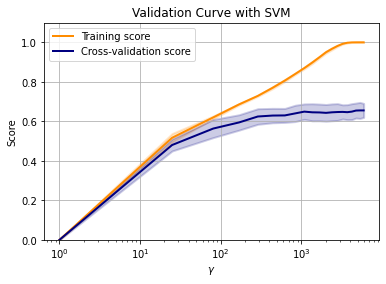

In [4]:
# optimize number of weak classifiers
param_range = list(exp_range(1, 100, 4, 2))

results = []
scoring = 'recall'
classifier = AdaBoostClassifier(random_state=0)
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

train_scores, test_scores = plot_validation_curve(classifier, X_train, y_train, 
                      param_name='n_estimators', param_range=param_range,
                      cv=cv, scoring=scoring, n_jobs=8)

In [ ]:
# optimize number of weak classifiers
param_range = list(exp_range(80, 100, 4, 2))

scoring = 'recall'
classifier = AdaBoostClassifier(random_state=0)
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

train_scores_80_100, test_scores_80_100 = plot_validation_curve(classifier, X_train, y_train, 
                      param_name='n_estimators', param_range=param_range,
                      cv=cv, scoring=scoring, n_jobs=8)

/home/jay/.virtualenv/cs7641-sl/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jay/.virtualenv/cs7641-sl/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jay/.virtualenv/cs7641-sl/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jay/.virtualenv/cs7641-sl/lib/python3.9/site-packages/sklearn

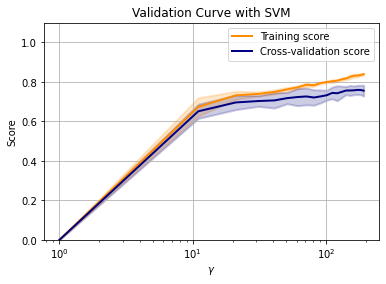

In [6]:
# optimize hidden_layer_sizes
param_range = range(1, 200, 10)

results = []
scoring = 'precision'
classifier = AdaBoostClassifier(random_state=0)
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

train_scores, test_scores = plot_validation_curve(classifier, X_train, y_train, 
                      param_name='n_estimators', param_range=param_range,
                      cv=cv, scoring=scoring, n_jobs=8)

In [ ]:
# optimize hidden_layer_sizes
param_range = list(exp_range(10, 80, 4, 2))

results = []
scoring = 'f1'
classifier = AdaBoostClassifier(random_state=0)
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

train_scores, test_scores = plot_validation_curve(classifier, X_train, y_train, 
                      param_name='n_estimators', param_range=param_range,
                      cv=cv, scoring=scoring, n_jobs=8)

In [ ]:
# optimize hidden_layer_sizes
param_range = list(exp_range(10, 80, 4, 2))

results = []
scoring = 'accuracy'
classifier = AdaBoostClassifier(random_state=0)
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

train_scores, test_scores = plot_validation_curve(classifier, X_train, y_train, 
                      param_name='n_estimators', param_range=param_range,
                      cv=cv, scoring=scoring, n_jobs=8)